In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#Step 1: Getting and setting up the data.
#Step 2: Visualizing current data.
#Step 3: The mathematics behind the Least Squares Method.
#Step 4: Using Numpy for a Univariate Linear Regression.
#Step 5: Getting the error.
#Step 6: Using scikit learn to implement a multivariate regression.
#Step 7: Using Training and Validation.  
#Step 8: Predicting Prices
#Step 9 : Residual Plots

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

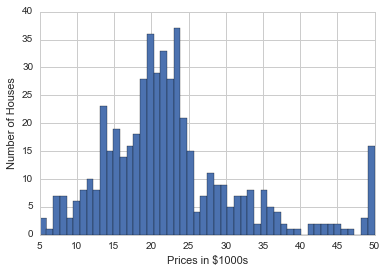

In [9]:
# Quick visualization
# make a histogram of prices
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

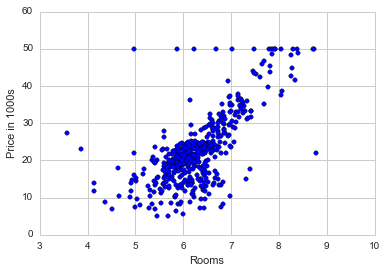

In [11]:
# Lets scatter one feature vs the target
plt.scatter(boston.data[:,5],boston.target)

plt.xlabel('Rooms')
plt.ylabel('Price in 1000s')

In [13]:
#Reset the data as a pandas df
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [14]:
boston_df['Price'] = boston.target

In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


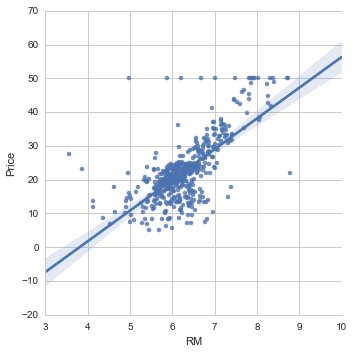

In [16]:
sns.lmplot('RM','Price',data=boston_df)

In [17]:
# How do we know when this line is the best fit?

In [18]:
#Use numpy to create a univariate linear regression
#set an x and y array for numpy
# numpy expects a 2 dimentional array for the x value array


In [22]:
X = boston_df.RM
#Setup the 2 dimensional array for X
X = np.vstack(boston_df.RM)
X.shape


(506L, 1L)

In [23]:
Y = boston_df.Price

In [24]:
# [X 1] , Use list comprehension
#for every value in X, set it up as value , 1 to match A = [X 1]
X = np.array( [ [value,1] for value in X] )

In [25]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [26]:
# Now we can get our best fit values
# Lets get the M and B values for Y = mX + B
m , b = np.linalg.lstsq(X,Y)[0]

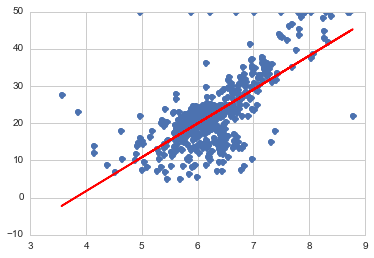

In [31]:
# Matrix transformation is to utilize the numPy lstsq method
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM

plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [35]:
#Find the error in our fitted line
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Total error is stored at index = 1
error_total = result[1]

#Root mean squared error
rmse = np.sqrt(error_total/len(X))

print ' The root mean squared error was %.2f' %rmse

 The root mean squared error was 6.60


In [36]:
# Since the root mean squared error corresponds closely with the standard deviation.
# We can say the price of a house won't vary more than two times the value of the rmse, 95% of the time


#Use scikit learn to implement a multivariate regression

In [37]:
import sklearn
from sklearn.linear_model import LinearRegression

In [38]:
# The fit method is used to learn the parameters of the model
#lreg.fit() which fits a linear model

# The predict method is used to predict the value of the response variable for the explatory variable.
#lreg.predict() which is used to predict Y using the linear model with estimated coefficients

#lreg.score() which returns the coefficient of determination (R^2)
#A measure of how well observed outcomes are replicated by the model

# Create a linear regression object
lreg = LinearRegression()

In [39]:
#Include everything, besides the target
X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

In [40]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
print ' The estimated intercept coefficent is %.2f ' %lreg.intercept_
print ' The number of coefficent used was %d ' %len(lreg.coef_)

 The estimated intercept coefficent is 36.49 
 The number of coefficent used was 13 


In [44]:
coeff_df = DataFrame(boston_df.columns)
#setup a column in the dataframe called features
coeff_df.columns = ['Features']
#setup a new column, lining up features from the linear regression
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [45]:
#Take your x values and y values and separate them into training set and a testing set for x and y.
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)



In [47]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

 (379L, 2L) (127L, 2L) (379L,) (127L,)


In [48]:
#create a regression object
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [52]:
print " Fit a model X_train, and calculate the mean squared error with Y_train: %.2f " % np.mean((Y_train-pred_train)**2)
print " Fit a model X_train, and calculate the mean squared error with X_test and Y_test: %.2f " % np.mean((Y_test - pred_test)**2)

 Fit a model X_train, and calculate the mean squared error with Y_train: 47.10 
 Fit a model X_train, and calculate the mean squared error with X_test and Y_test: 33.44 


In [53]:
#How do you know if you're close to what you need?

In [54]:
# Residual plot to visualize how good our analysis was

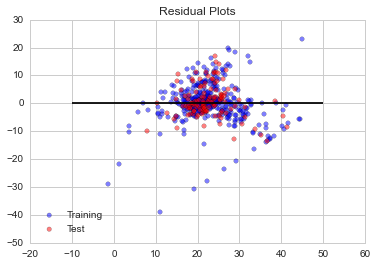

In [56]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)

#plot a horizonal line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#plot labels
plt.legend((train,test),('Training','Test'),loc='lower left')

#plot title
plt.title('Residual Plots')


In [ ]:
#Regression was a great choice for this analysis